In [8]:
import torch
data = torch.load("datasets/CeleV-Text/processed_sdxl_512/aOSR0qNhJlM_3_0.pt",map_location='cpu')


In [10]:

data2 = torch.load("datasets/CeleV-Text/processed_sdxl_512/-B4DZ2EYmgY_20_0.pt",map_location='cpu')
for key in data2.keys():
    print(key)
    print(data2[key].shape)


latent
torch.Size([4, 16, 64, 64])
ref_images_latent
torch.Size([1, 4, 16, 64, 64])
face_ids
torch.Size([16, 512])
image_embeds
torch.Size([16, 257, 1280])
prompt_embeds
torch.Size([77, 2048])
pooled_prompt_embeds
torch.Size([1280])
prompt_embeds_trigger
torch.Size([16, 77, 2048])
pooled_prompt_embeds_trigger
torch.Size([1280])
prompt


AttributeError: 'str' object has no attribute 'shape'

In [11]:
len(data["prompt_embeds_trigger"].shape)

3

In [9]:
for key in data.keys():
    print(key)
    print(data[key].shape)

latent
torch.Size([4, 16, 64, 64])
ref_images_latent
torch.Size([1, 4, 1, 64, 64])
face_ids
torch.Size([1, 512])
image_embeds
torch.Size([1, 257, 1280])
prompt_embeds
torch.Size([77, 2048])
pooled_prompt_embeds
torch.Size([1280])
prompt_embeds_trigger
torch.Size([77, 2048])
pooled_prompt_embeds_trigger
torch.Size([1280])
prompt


AttributeError: 'str' object has no attribute 'shape'

In [7]:
print(data)

{'video': tensor([[[[[-5.6925e-01, -9.9483e-01, -1.0092e+00,  ..., -5.1724e-01,
            -1.5194e+00, -1.5026e+00],
           [-6.5550e-01, -3.8380e-01, -8.3188e-01,  ..., -1.4978e+00,
            -8.4553e-01, -1.4986e+00],
           [-3.1821e-01, -5.6923e-01, -4.7527e-01,  ..., -1.6703e+00,
            -9.4404e-01, -1.5886e+00],
           ...,
           [-8.8517e-01, -3.5274e-01, -5.8983e-01,  ..., -1.2884e+00,
            -5.3110e-01, -4.2583e-01],
           [ 6.0419e-01,  1.2255e+00,  1.6383e+00,  ..., -7.9398e-01,
            -6.4814e-01,  8.9559e-02],
           [ 1.2311e+00,  1.1979e+00,  7.6779e-01,  ..., -1.6111e-01,
            -1.9499e-01, -1.9635e-01]],

          [[-8.2030e-01, -5.8706e-01, -5.1345e-01,  ..., -1.9812e+00,
            -1.3392e+00, -1.8679e+00],
           [-7.3591e-02, -5.2794e-01, -1.0164e+00,  ..., -1.2814e+00,
            -1.6577e+00, -2.0197e+00],
           [-5.9802e-01, -2.6066e-02, -9.7648e-01,  ..., -2.0794e+00,
            -1.5143e+00, -2.12

In [4]:
data['processed_sdxl_512/aOSR0qNhJlM_3_0.pt']

torch.float32

In [5]:
data.keys()

dict_keys(['latent', 'image_embeds', 'prompt_embeds', 'pooled_prompt_embeds', 'class_tokens_mask', 'prompt_embeds_trigger', 'pooled_prompt_embeds_trigger', 'prompt', 'prompt_trigger', 'face_ids'])

In [6]:
data['image_embeds'].dtype

torch.float16

In [8]:
data['prompt_embeds'].dtype

torch.float32

In [9]:
data['pooled_prompt_embeds'].dtype

torch.float32

In [10]:
data['class_tokens_mask'].dtype

torch.bool

In [12]:
data['prompt_embeds_trigger'].dtype

torch.float32

In [13]:
for key in data.keys():
    print(data[key].dtype)

torch.float32
torch.float16
torch.float32
torch.float32
torch.bool
torch.float32
torch.float32


AttributeError: 'str' object has no attribute 'dtype'

In [12]:
import cv2
import numpy as np
from insightface.app import FaceAnalysis
from insightface.utils import face_align
from PIL import Image
# Load face encoder
app = FaceAnalysis(name="buffalo_l",
                    root="./pretrain_model",
                    providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

image = Image.open("datasets/lecun/yann-lecun5.jpg").convert('RGB')
image = np.array(image)
# image = resize_img(image)
face_info = app.get(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
face_info = sorted(face_info, key=lambda x:(x['bbox'][2]-x['bbox'][0])*(x['bbox'][3]-x['bbox'][1]))[-1] # only use the maximum face



Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'device_id': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'cudnn_conv_use_max_workspace': '1', 'tunable_op_enable': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0'}}
find model: ./pretrain_model/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'device_id': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_

In [13]:
norm_face = face_align.norm_crop(image, landmark=face_info.kps, image_size=512)

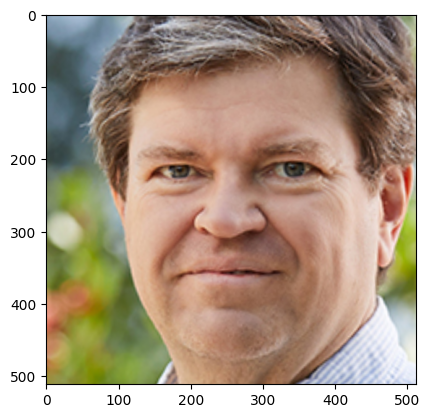

In [14]:
import matplotlib.pyplot as plt

plt.imshow(norm_face)

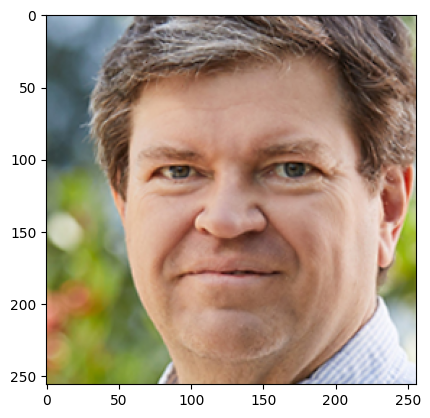

In [15]:
norm_face2 = face_align.norm_crop(image, landmark=face_info.kps, image_size=256)


plt.imshow(norm_face2)

In [1]:
import torch
data = torch.load('/group/40033/public_datasets/CeleV-Text//processed_sd15/-756Qxryd4Y_7_0.pt',map_location='cpu')
data.keys()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/data/home/jackeywu/.local/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/data/home/jackeywu/.local/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/data/home/jackeywu/.local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File 

dict_keys(['latent', 'prompt_embeds', 'ref_images_latent', 'bbox', 'prompt'])

In [2]:
for key in data.keys():
    print(data[key].shape)

torch.Size([4, 16, 64, 64])
torch.Size([77, 768])
torch.Size([4, 16, 64, 64])


AttributeError: 'list' object has no attribute 'shape'

In [1]:
import torch
data = torch.load('./datasets/CeleV-Text/processed_512/09D-yUunLDU_0_2.pt')

OSError: [Errno 40] Too many levels of symbolic links: './datasets/CeleV-Text/processed_512/09D-yUunLDU_0_2.pt'

In [1]:

import torch
from diffusers import AutoencoderKL
from diffusers.video_processor import VideoProcessor

latent = torch.load("/group/40034/jackeywu/code/PhotoMaker/datasets/CeleV-Text/processed_sd15/___5yD2BVx8_4_0.pt",map_location='cpu')
latent = latent['latent']
latent=latent.unsqueeze(0)
print(latent.shape)


def decode_latents(vae, latents):
    latents = 1 / vae.config.scaling_factor * latents

    batch_size, channels, num_frames, height, width = latents.shape
    latents = latents.permute(0, 2, 1, 3, 4).reshape(batch_size * num_frames, channels, height, width)

    image = vae.decode(latents).sample
    video = image[None, :].reshape((batch_size, num_frames, -1) + image.shape[2:]).permute(0, 2, 1, 3, 4)
    # we always cast to float32 as this does not cause significant overhead and is compatible with bfloat16
    video = video.float()
    return video

vae = AutoencoderKL.from_pretrained("./pretrain_model/stable-diffusion-v1-5", subfolder="vae",use_safetensors=True)
vae = vae.to("cuda")
# vae.enable_slicing()
# vae.enable_tiling()


SyntaxError: invalid syntax (<ipython-input-1-146a94b0f6f7>, line 27)

In [2]:
video_processor = VideoProcessor(vae_scale_factor=vae.config.scaling_factor)
latents = latent.to("cuda")

print("vae.config.scaling_factor",vae.config.scaling_factor)
latents = latents vae.config.scaling_factor
batch_size, channels, num_frames, height, width = latents.shape
print(batch_size, channels, num_frames, height, width)
latents = latents.permute(0, 2, 1, 3, 4).reshape(batch_size * num_frames, channels, height, width)
print(latents.shape)
image = vae.decode(latents).sample
video = image[None, :].reshape((batch_size, num_frames, -1) + image.shape[2:]).permute(0, 2, 1, 3, 4)
# we always cast to float32 as this does not cause significant overhead and is compatible with bfloat16
video = video.float().detach()
video = video_processor.postprocess_video(video=video, output_type='pil')
video = video[0]
from diffusers.utils import export_to_gif, load_image
export_to_gif(video, "video.gif")

SyntaxError: invalid syntax (<ipython-input-2-00943c5272b7>, line 5)